# MODEL GRIDS WITH PYCLOUDY

## Global budget

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
pc.config.cloudy_exe = 'cloudy.exe'
models_dir = '../../Models/'

### Construct a series of plane-parallel models of density n = 100 cm$^{-3}$ ionized by a blackbody at 50,000 K, varying log U between -3.5 and -1.5 by steps of 0.5 dex and the metallicity as 12 + log O/H from 7 to 9 by steps of 0.5 dex (take He/H =0.1 for all the models and adopt the solar abundance ratios from Asplund et al. (2009) for all the heavy elements).

##### We define some function to prepare and run the grid of Cloudy models.

In [35]:
options = ('no molecules',
           'no level2 lines',
           'no fine opacities',
           'atom h-like levels small',
           'atom he-like levels small',
           'element limit off -7',
            )
from pyCloudy.utils.physics import abund_Asplund_2009

def get_R_in_Q0(logU, fr, NH=100, ff=1.0):
    c = pc.CST.CLIGHT
    U_mean = 10**logU
    w = (1 + fr**3.)**(1./3) - fr
    alpha_B = 2.6e-13
    Q0 = 4. * np.pi * c**3 * U_mean**3 / (3. * NH * ff**2 * alpha_B**2 * w**3)
    R_str = (3. * Q0 / (4 * np.pi * NH**2 * alpha_B * ff))**(1./3)
    R_in = fr * R_str
    return R_in, Q0

def make_mod(name, logU, ab_O):
    NH = 100
    ff = 0.1
    fr = 3.00
    R_in, Q0 = get_R_in_Q0(logU, fr=fr, NH=NH, ff=ff)
    c_input = pc.CloudyInput('{0}/{1}'.format(models_dir, name))
    c_input.set_BB(Teff = 50000., lumi_unit = 'q(H)', lumi_value = np.log10(Q0))
    c_input.set_cste_density(np.log10(NH), ff = ff)
    c_input.set_radius(r_in = np.log10(R_in))
    abund = abund_Asplund_2009.copy()
    delta_O = ab_O - 12 - abund['O']
    for elem in abund:
        if elem != 'He':
            abund[elem] += delta_O
    c_input.set_abund(ab_dict = abund)
    #c_input.set_grains('Orion {}'.format(10**delta_O))
    c_input.set_distance(dist=1., unit='kpc', linear=True)
    c_input.set_other(options)
    c_input.set_stop(('temperature off', 'pfrac 0.02'))
    c_input.print_input()

In [44]:
generic_name = 'M7nd_'

##### We prepare the models

In [37]:
for logU in np.arange(-3.5, -1.49, 0.5):
    for ab_O in np.arange(7, 9.1, 0.5):
        name = '{}{:.1f}_{:.1f}'.format(generic_name, logU, ab_O)
        make_mod(name, logU, ab_O)

##### We run the models.

In [39]:
pc.run_cloudy(dir_=models_dir, n_proc=8, model_name=generic_name)

##### We read the models in a list.

In [45]:
Msnd = pc.load_models('{}/{}'.format(models_dir, generic_name),
                    read_emis = False)

In [49]:
print(Msnd)

[<Cloudy model from ../../Models/M7nd_-1.5_7.0>, <Cloudy model from ../../Models/M7nd_-1.5_7.5>, <Cloudy model from ../../Models/M7nd_-1.5_8.0>, <Cloudy model from ../../Models/M7nd_-1.5_8.5>, <Cloudy model from ../../Models/M7nd_-1.5_9.0>, <Cloudy model from ../../Models/M7nd_-2.0_7.0>, <Cloudy model from ../../Models/M7nd_-2.0_7.5>, <Cloudy model from ../../Models/M7nd_-2.0_8.0>, <Cloudy model from ../../Models/M7nd_-2.0_8.5>, <Cloudy model from ../../Models/M7nd_-2.0_9.0>, <Cloudy model from ../../Models/M7nd_-2.5_7.0>, <Cloudy model from ../../Models/M7nd_-2.5_7.5>, <Cloudy model from ../../Models/M7nd_-2.5_8.0>, <Cloudy model from ../../Models/M7nd_-2.5_8.5>, <Cloudy model from ../../Models/M7nd_-2.5_9.0>, <Cloudy model from ../../Models/M7nd_-3.0_7.0>, <Cloudy model from ../../Models/M7nd_-3.0_7.5>, <Cloudy model from ../../Models/M7nd_-3.0_8.0>, <Cloudy model from ../../Models/M7nd_-3.0_8.5>, <Cloudy model from ../../Models/M7nd_-3.0_9.0>, <Cloudy model from ../../Models/M7nd_-3

In [29]:
M = Ms[0]
M.print_stats()

 Name of the model: ../../Models/M7_-1.5_7.0
 R_in (cut) = 2.992e+22 (2.992e+22), R_out (cut) = 3.045e+22 (3.045e+22)
 H+ mass = 5.06e+10, H mass = 5.09e+10
 <H+/H> = 1.00, <He++/He> = 0.00, <He+/He> = 1.00
 <O+++/O> = 0.00, <O++/O> = 0.97, <O+/O> = 0.03
 <N+++/O> = 0.14, <N++/O> = 0.84, <N+/O> = 0.02
 T(O+++) = 21382, T(O++) = 19233, T(O+) = 16967
 <ne> = 108,  <nH> = 100, T0 = 19158, t2=0.0028
 <log U> = -1.50


In [30]:
M.out

{'###First': ' ####  1  Te:2.218E+04 Hden:1.000E+02 Ne:1.118E+02 R:2.992E+22 R-R0:9.336E+14 dR:1.867E+15 NTR:  8 Htot:1.944E-20 T912: 1.11e-05###\n',
 '###Last': ' ####192  Te:8.014E+03 Hden:1.000E+02 Ne:2.499E+00 R:3.045E+22 R-R0:5.287E+20 dR:2.423E+16 NTR:  7 Htot:8.989E-23 T912: 2.11e+02###\n',
 'Blackbody': '                       * Blackbody 50000.000000                                                          *\n',
 'Chem1': '        H :  0.0000  He: -1.0700  C : -5.2600  N : -5.8600  O : -5.0000  Ne: -5.7600  Mg: -6.0900  Si: -6.1800  S : -6.5700\n',
 'Chem2': '                                                            Fe: -6.1900\n',
 'Chem3': ' \n',
 'Chem4': '                                                    Grain Chemical Composition\n',
 'Cloudy ends': ' Cloudy ends: 192 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 35.42\n',
 'D/G': ' Dust to gas ratio (by mass): 1.157e-04, A(V)/N(H)(pnt):1.132e-23, (ext):8.193e-24, R:3.676e+00 AV(ext):4.331e-02 (pnt):5.98

##### We verify that the Hbeta flux is available from the CloudyModel object.

In [31]:
print(np.float(pc.sextract(Ms[0].out['Hbeta'], 'H  1      4861.36A', '1.000').strip()))

44.65


##### We define the variables to be plotted. They are mainly obtained by looping on the models, using list comprehension technic.

In [47]:
x = np.array([M.log_U_mean for M in Ms])
logHb = np.array([np.float(pc.sextract(M.out['Hbeta'], 'H  1      4861.36A', '1.000').strip()) for M in Ms])
logQ = np.log10(np.array([M.Q.sum() for M in Ms]))
y = logHb - logQ
c = 12+np.array([M.abund['O'] for M in Ms])

In [57]:
x2 = np.array([M.log_U_mean for M in Msnd])
logHb2 = np.array([np.float(pc.sextract(M.out['Hbeta'], 'H  1      4861.36A', '1.000').strip()) for M in Msnd])
logQ2 = np.log10(np.array([M.Q.sum() for M in Msnd]))
y2 = logHb2 - logQ2
c2 = 12+np.array([M.abund['O'] for M in Msnd])

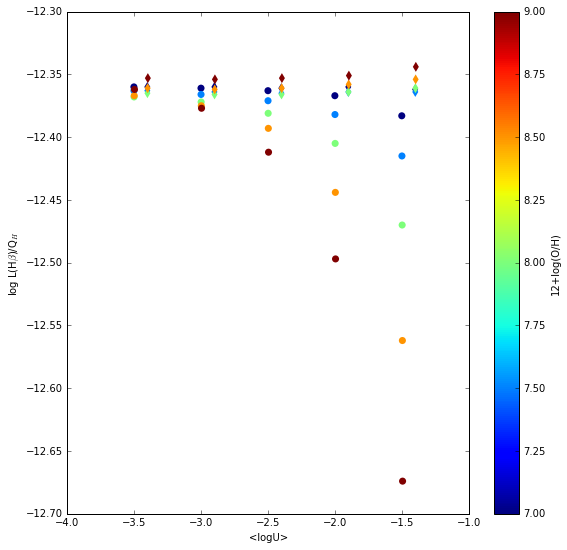

In [60]:
f, ax = plt.subplots(figsize=(9, 9))
sc = ax.scatter(x, y, c=c, edgecolor='none', s=50)
sc2 = ax.scatter(x2+0.1, y2, c=c2, edgecolor='none', s=50, marker='d')
ax.set_xlabel('<logU>')
ax.set_ylabel(r'log L(H$\beta$)/Q$_ H$')
cb = f.colorbar(sc2)
cb.set_label(r'12+log(O/H)')

In [ ]:
# the following is to have the nice style in the Notebook.
# Don't remove this.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()